**LIVER** **DISEASE** **PATIENT** **PREDICTION**

Collect Data and Get information:


       I"m not a medical student ,so first browse to know about the liver disease symptoms and major cause of the disease.

In [66]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [67]:
import warnings
warnings.filterwarnings('ignore')

In [68]:
df=pd.read_csv('indian_liver_patient.csv')

In [69]:
df.head()


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [70]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


**Data** **Preprocessing**:

In [71]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [72]:
df['Albumin_and_Globulin_Ratio'].isna().sum()

4

In [73]:
df['Albumin_and_Globulin_Ratio'].dtype

dtype('float64')

In [74]:
df.shape

(583, 11)

In [75]:
df['Albumin_and_Globulin_Ratio']=df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].median())

In [76]:
df['Albumin_and_Globulin_Ratio'].isna().sum()

0

In [77]:
df=df.rename(columns={'Dataset':'liver_disease'},inplace=False)

In [78]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,liver_disease
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1




**Data** **visualization**:



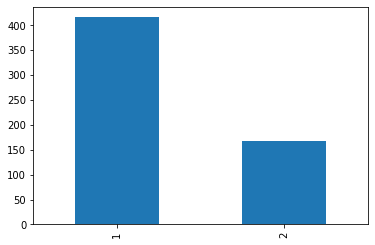

In [79]:
df['liver_disease'].value_counts().plot.bar()

patient data : 1 is Liver disease present ,2 is no liver disease,its seems high no. of liver patient occurs in this data. By chance model goes single site.

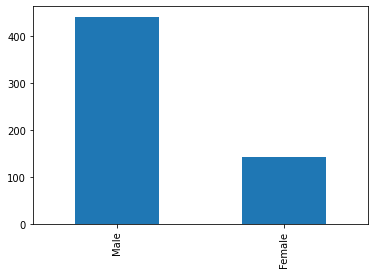

In [80]:
df['Gender'].value_counts().plot.bar()

In [81]:
df['liver_disease'].unique()

array([1, 2])

In [82]:
df['liver_disease']=df['liver_disease'].map({2:0,1:1})

In [83]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'liver_disease'],
      dtype='object')

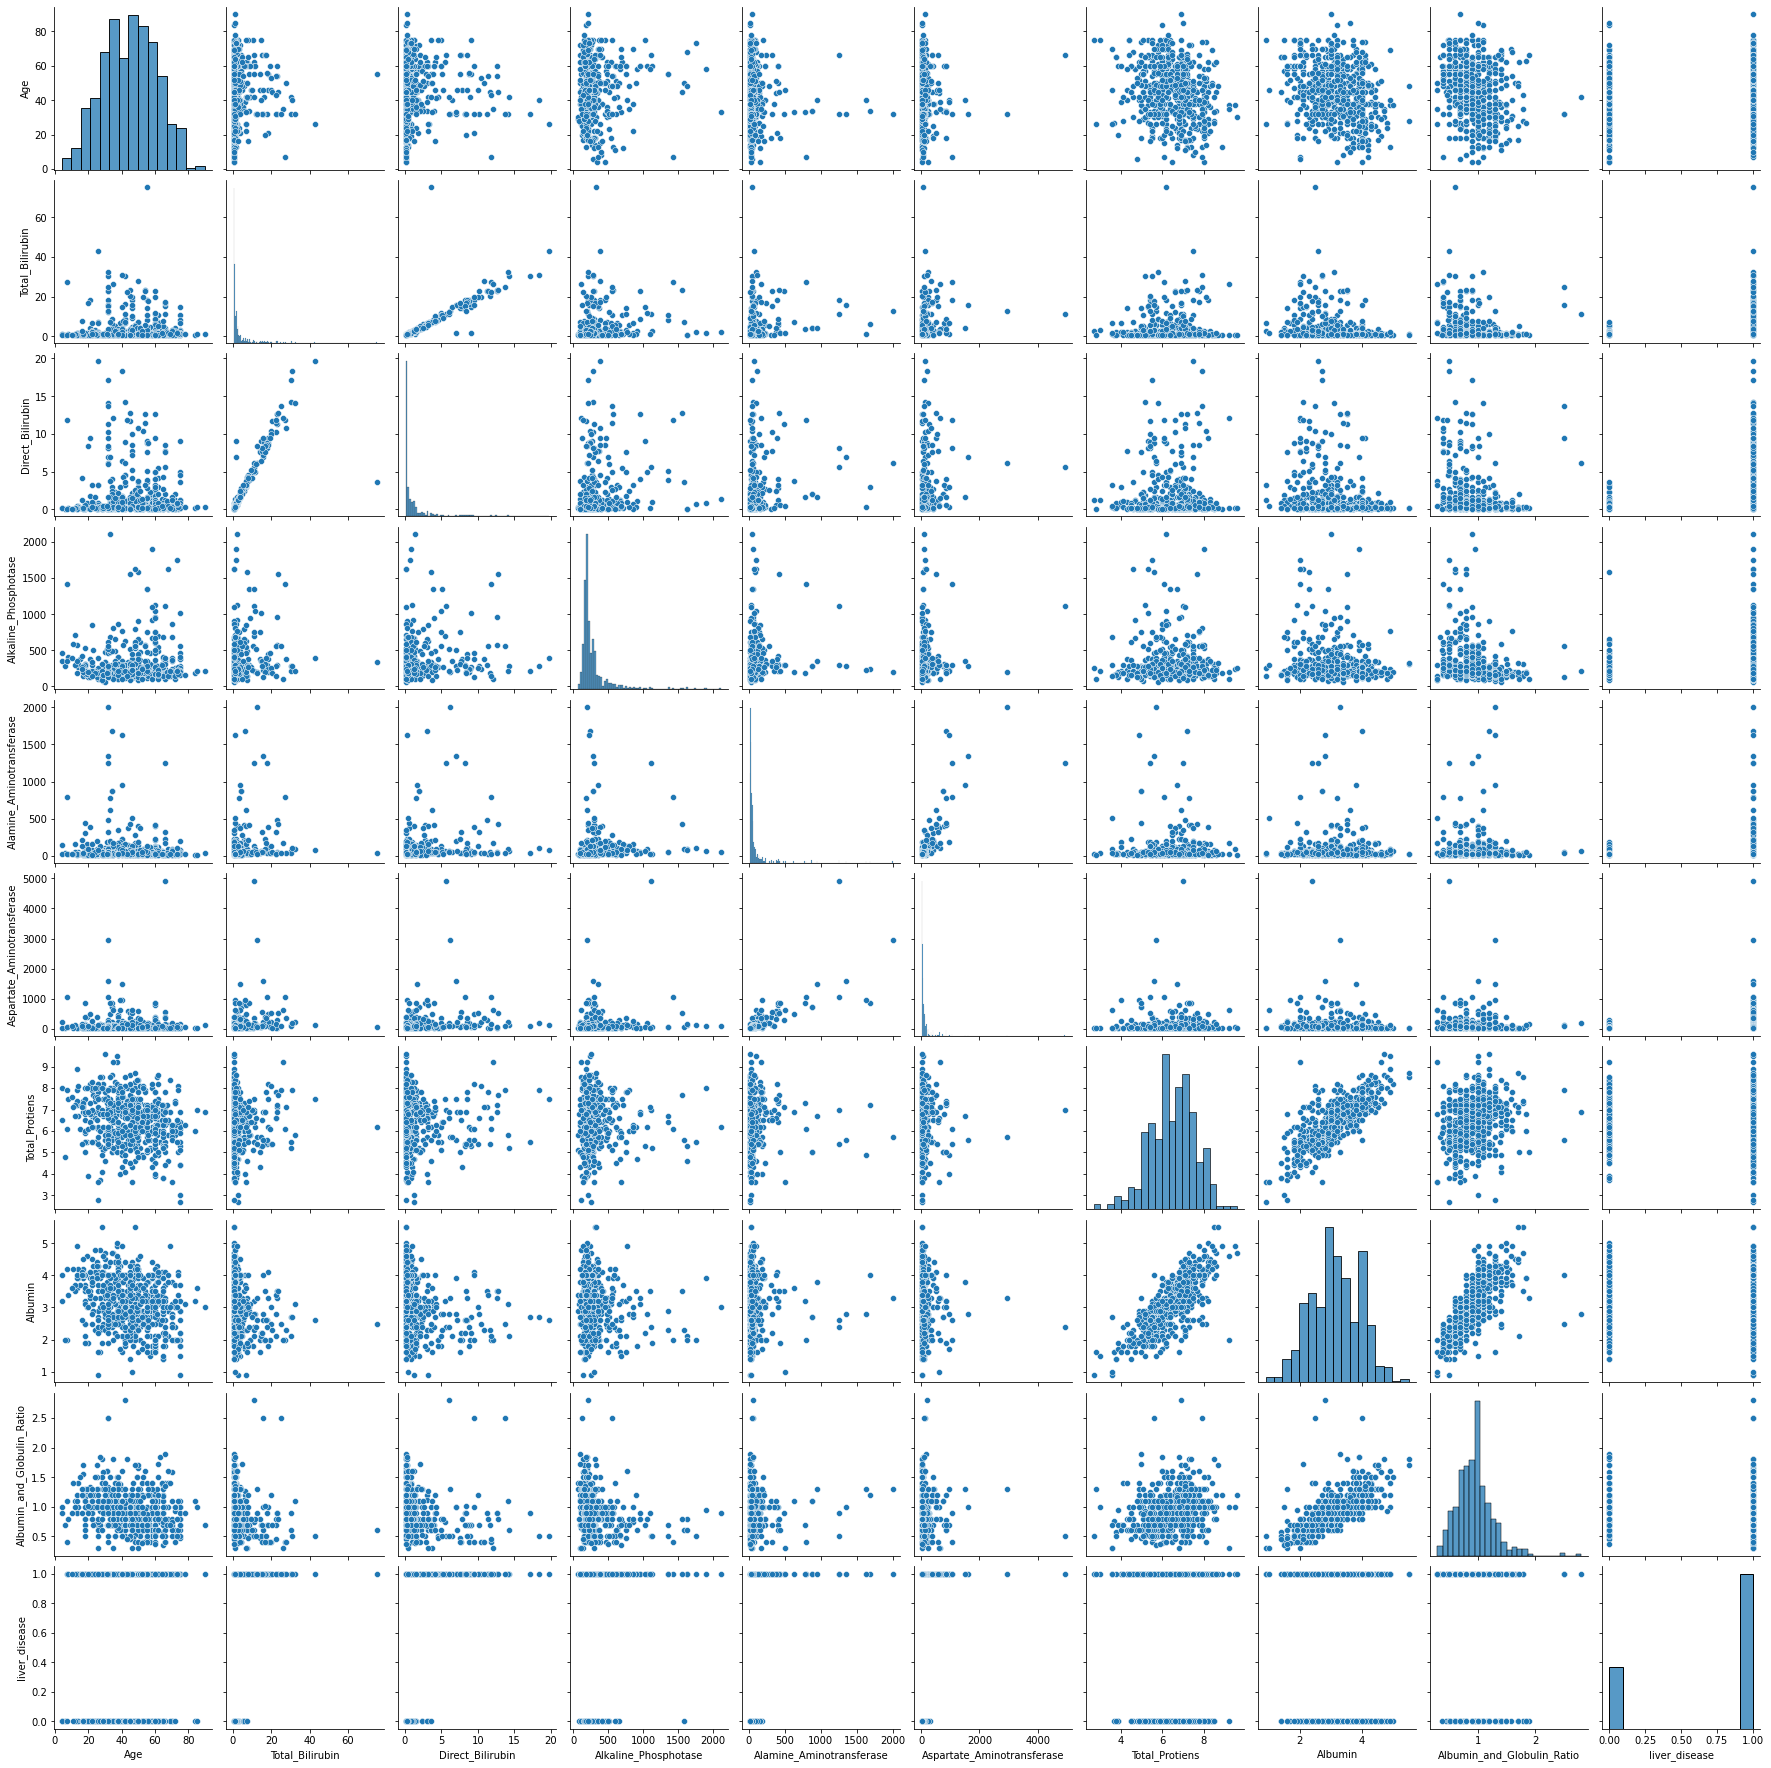

In [84]:
sns.pairplot(df)

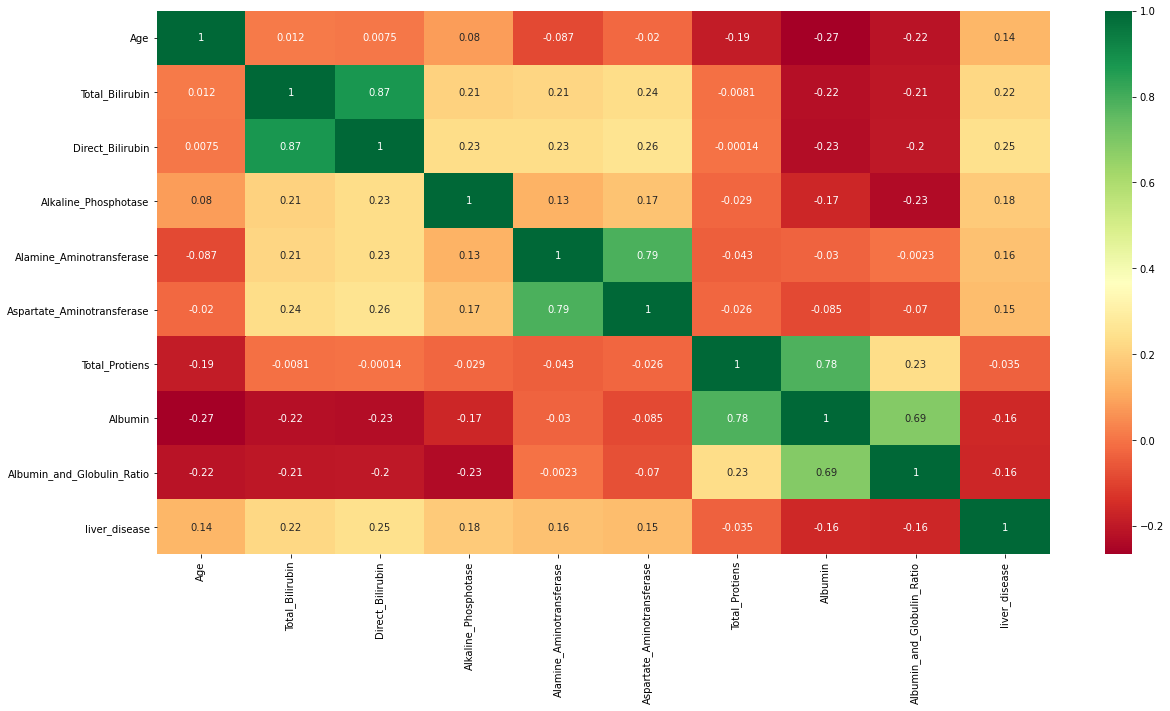

In [85]:
corr=df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')

In [86]:
print(corr['Age'].sort_values(ascending=False)[:])

Age                           1.000000
liver_disease                 0.137351
Alkaline_Phosphotase          0.080425
Total_Bilirubin               0.011763
Direct_Bilirubin              0.007529
Aspartate_Aminotransferase   -0.019910
Alamine_Aminotransferase     -0.086883
Total_Protiens               -0.187461
Albumin_and_Globulin_Ratio   -0.215968
Albumin                      -0.265924
Name: Age, dtype: float64


In [87]:
df.skew(axis = 0, skipna = True)

Age                           -0.029385
Total_Bilirubin                4.907474
Direct_Bilirubin               3.212403
Alkaline_Phosphotase           3.765106
Alamine_Aminotransferase       6.549192
Aspartate_Aminotransferase    10.546177
Total_Protiens                -0.285672
Albumin                       -0.043685
Albumin_and_Globulin_Ratio     0.996780
liver_disease                 -0.947140
dtype: float64

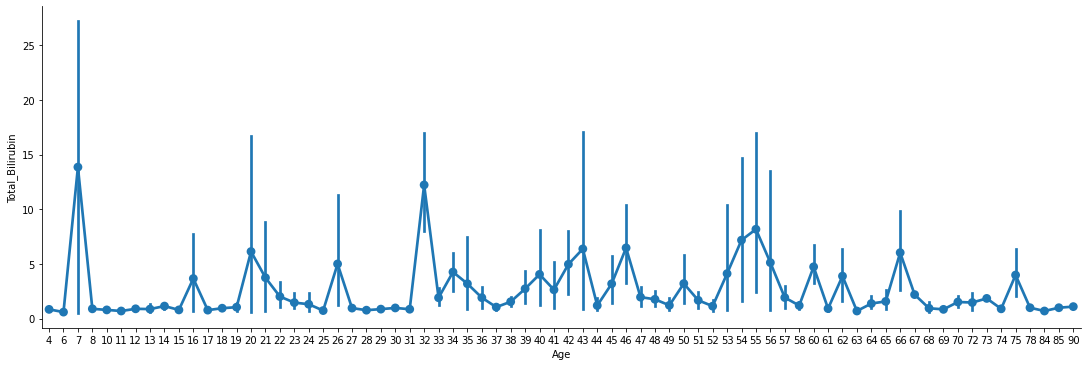

In [88]:
sns.factorplot(x='Age',y='Total_Bilirubin',data=df,aspect=3)

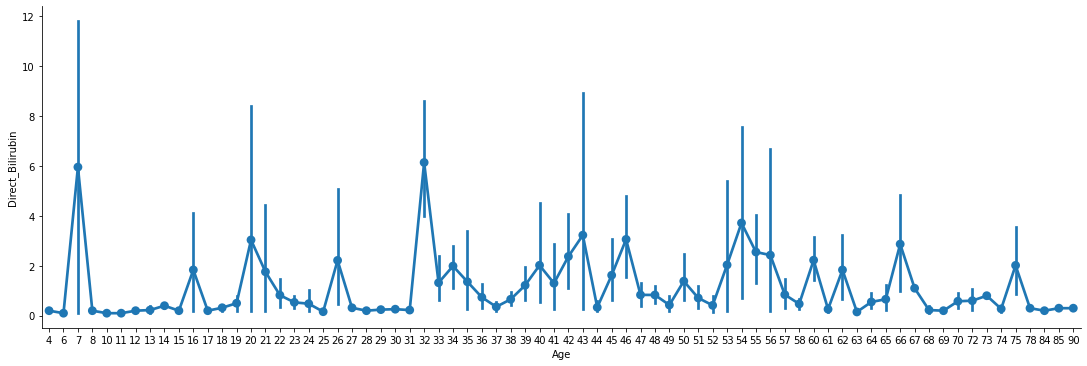

In [89]:
sns.factorplot(x='Age',y='Direct_Bilirubin',data=df,aspect=3)

In [90]:
num_feature=df.select_dtypes(include=[np.number])
num_feature.columns

Index(['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio',
       'liver_disease'],
      dtype='object')

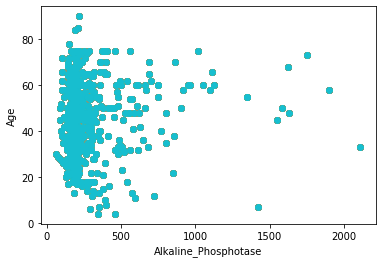

In [91]:
for feature in num_feature:
    data=df.copy()
    plt.scatter(df['Alkaline_Phosphotase'],df['Age'])
    plt.xlabel('Alkaline_Phosphotase')
    plt.ylabel('Age')

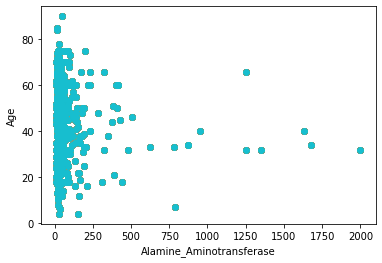

In [92]:
for feature in num_feature:
    data=df.copy()
    plt.scatter(df['Alamine_Aminotransferase'],df['Age'])
    plt.xlabel('Alamine_Aminotransferase')
    plt.ylabel('Age')

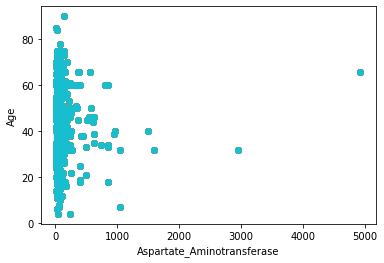

In [93]:
for feature in num_feature:
    data=df.copy()
    plt.scatter(df['Aspartate_Aminotransferase'],df['Age'])
    plt.xlabel('Aspartate_Aminotransferase')
    plt.ylabel('Age')

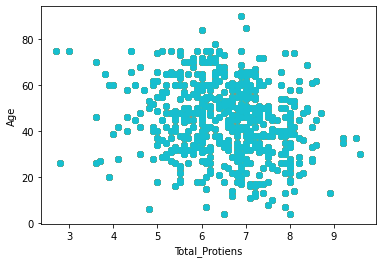

In [94]:
for feature in num_feature:
    data=df.copy()
    plt.scatter(df['Total_Protiens'],df['Age'])
    plt.xlabel('Total_Protiens')
    plt.ylabel('Age')

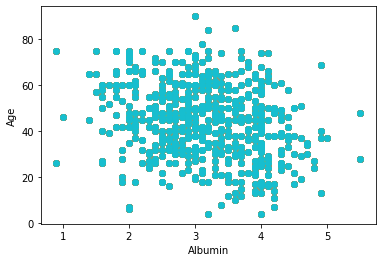

In [95]:
for feature in num_feature:
    data=df.copy()
    plt.scatter(df['Albumin'],df['Age'])
    plt.xlabel('Albumin')
    plt.ylabel('Age')

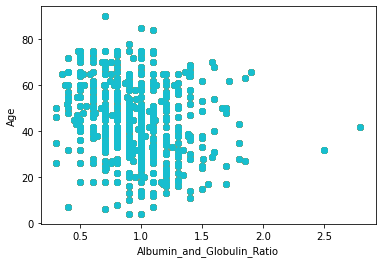

In [96]:
for feature in num_feature:
    data=df.copy()
    plt.scatter(df['Albumin_and_Globulin_Ratio'],df['Age'])
    plt.xlabel('Albumin_and_Globulin_Ratio')
    plt.ylabel('Age')

In [97]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [98]:
df['Gender']=df['Gender'].map({'Female':0,'Male':1})

In [99]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,liver_disease
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [100]:
X=df.iloc[ : , :-1]
y=df['liver_disease']


**Feature** **selection**:

In [101]:
#feature selection
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

ss=SelectKBest(f_classif,k=10)

In [102]:
ss.fit(X,y)

SelectKBest(k=10, score_func=<function f_classif at 0x7f32623ffbf8>)

In [103]:
ss.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [104]:
X_t=X.columns[ss.get_support()]

In [105]:
X_fet=df[X_t]

**Feature** **Scaling**:

In [106]:
#Normalization
X=(X_fet-np.min(X_fet))/(np.max(X_fet)-np.min(X_fet))

In [107]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled= ros.fit_resample(X,y)

**Model** **Train**:

In [108]:
score=[] #these variables will be used to show the algorithm name and its successes.
algorithms=[]

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
x_train,x_test,y_train,y_test=train_test_split(X_resampled, y_resampled,test_size=0.33, random_state=42)

In [110]:
x_train.shape

(557, 10)

In [113]:
y_train.shape

(557,)

its seems data in y_train more than 50% in liver disease possibilities site .so i decide data is imbalanced. i tried to balance the data.

KNN accuracy = 70.54545454545455
Accuracy score -  0.7054545454545454
sensitivity: 0.29454545454545455
Test set ROC AUC score: 0.697


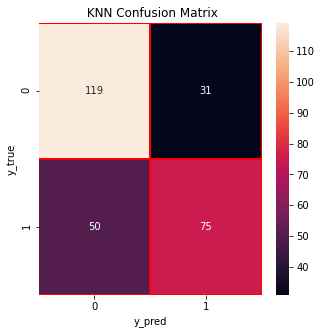

In [114]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#model and accuracy
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
knn.predict(x_test)
score.append(knn.score(x_test,y_test)*100)
algorithms.append("KNN")
print("KNN accuracy =",knn.score(x_test,y_test)*100)

#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred_knn=knn.predict(x_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred_knn)

print("Accuracy score - ", metrics.accuracy_score(y_true,y_pred_knn))
print('sensitivity:',(1-(metrics.accuracy_score(y_true,y_pred_knn))))

from sklearn.metrics import roc_auc_score

test_roc_auc = roc_auc_score(y_true, y_pred_knn)

# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title(" KNN Confusion Matrix")
plt.show()

Score = 72.0
Accuracy score -  0.72
Test set ROC AUC score: 0.693
sensitivity: 0.28


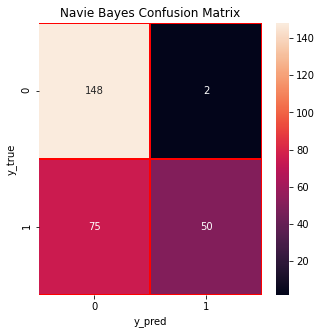

In [115]:
#Navie-Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
nb=GaussianNB()

#Training
nb.fit(x_train, y_train)
#Test
score.append(nb.score(x_test,y_test)*100)
algorithms.append("Navie-Bayes")
print("Score =",nb.score(x_test,y_test)*100)


#Confusion Matrix 
from sklearn.metrics import confusion_matrix
y_pred_nb=nb.predict(x_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred_nb)

print("Accuracy score - ", metrics.accuracy_score(y_test,y_pred_nb))
from sklearn.metrics import roc_auc_score
test_roc_auc = roc_auc_score(y_test, y_pred_nb)

# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))
print('sensitivity:',(1-(metrics.accuracy_score(y_test,y_pred_nb))))
#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Navie Bayes Confusion Matrix")
plt.show()

Random Forest accuracy = 0.8181818181818182
Accuracy score -  0.8181818181818182
sensitivity: 0.18181818181818177
Test set ROC AUC score: 0.811


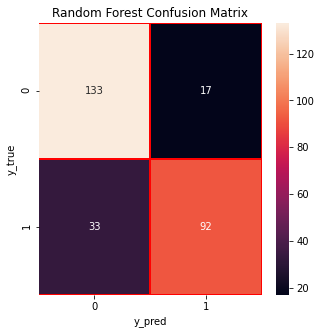

In [124]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train, y_train)
score.append(rf.score(x_test,y_test)*100)
algorithms.append("Random Forest")
print("Random Forest accuracy =",rf.score(x_test,y_test))

#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred_rf=rf.predict(x_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred_rf)


print("Accuracy score - ", metrics.accuracy_score(y_true,y_pred_rf))
print('sensitivity:',(1-(metrics.accuracy_score(y_true,y_pred_rf))))

from sklearn.metrics import roc_auc_score
test_roc_auc = roc_auc_score(y_test, y_pred_rf)

# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Random Forest Confusion Matrix")
plt.show()

svm test accuracy = 67.63636363636364
Accuracy score -  0.6763636363636364
sensitivity: 0.3236363636363636
Test set ROC AUC score: 0.663


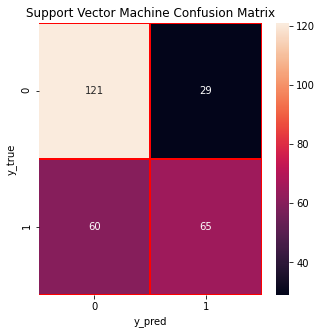

In [117]:
#Support Vector Machine
from sklearn.svm import SVC
svm=SVC(random_state=1)
svm.fit(x_train, y_train)
score.append(svm.score(x_test,y_test)*100)
algorithms.append("Support Vector Machine")
print("svm test accuracy =",svm.score(x_test,y_test)*100)

#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred_svc=svm.predict(x_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred_svc)


print("Accuracy score - ", metrics.accuracy_score(y_true,y_pred_svc))
print('sensitivity:',(1-(metrics.accuracy_score(y_true,y_pred_svc))))

from sklearn.metrics import roc_auc_score
test_roc_auc = roc_auc_score(y_test, y_pred_svc)

# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Support Vector Machine Confusion Matrix")
plt.show()


Decision Tree accuracy: 79.27272727272727
Accuracy score -  0.7927272727272727
sensitivity: 0.20727272727272728
Test set ROC AUC score: 0.789


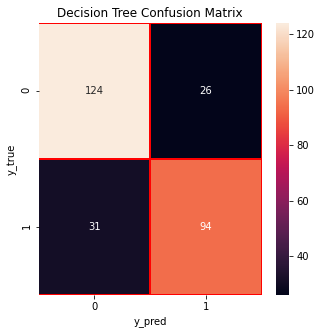

In [118]:
#Decision Tree 
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train, y_train)
print("Decision Tree accuracy:",dt.score(x_test,y_test)*100)
score.append(dt.score(x_test,y_test)*100)
algorithms.append("Decision Tree")

#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred_dt=dt.predict(x_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred_dt)


print("Accuracy score - ", metrics.accuracy_score(y_true,y_pred_dt))
print('sensitivity:',(1-(metrics.accuracy_score(y_true,y_pred_dt))))

from sklearn.metrics import roc_auc_score
test_roc_auc = roc_auc_score(y_test, y_pred_dt)

# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Decision Tree Confusion Matrix")
plt.show()


test accuracy 0.6690909090909091
Accuracy score -  0.6690909090909091
sensitivity: 0.33090909090909093
Test set ROC AUC score: 0.666


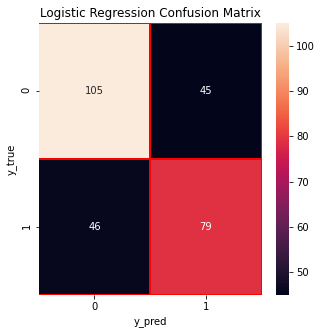

In [119]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
score.append(lr.score(x_test,y_test)*100)
algorithms.append("Logistic Regression")
print("test accuracy {}".format(lr.score(x_test,y_test)))
#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred_lr=lr.predict(x_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred_lr)

print("Accuracy score - ", metrics.accuracy_score(y_true,y_pred_lr))
print('sensitivity:',(1-(metrics.accuracy_score(y_true,y_pred_lr))))

from sklearn.metrics import roc_auc_score
test_roc_auc = roc_auc_score(y_test, y_pred_lr)

# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))


#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

{'n_estimators': [100, 111, 122, 133, 144, 155, 166, 177, 188, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [1, 2, 4, 6, 8, 10], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 5]}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=111, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=111, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.2s
[CV] n_estimators=111, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  n_estimators=111, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.2s
[CV] n_estimators=111, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=111, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.2s
[CV] n_estimators=111, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=111, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.2s
[CV] n_estimators=111, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=111, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.2s
[CV] n_estimators=155, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=2 
[CV]  n_estimators=155, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=2, total=   0.2s
[CV] n_estimators=155, min_samples_split=10, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   12.6s finished


Accuracy score -  0.8218181818181818
Test set ROC AUC score: 0.813


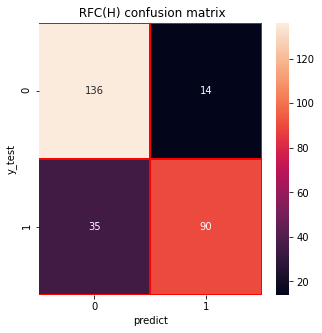

In [128]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

##Randomized search cv


#number of trees inrandom forest
n_estimators=[int(x) for x in np.linspace(start=100,stop=200,num=10)]
#n. of features to consider at every split
max_features=['auto','sqrt']
##max no. of levelin tree
max_depth=[int(x) for x in np.linspace(1,10,num=6)]
#max_depth.append(none)
#minium n0. of sample required to split a mode
min_samples_split=[2,5,10]
#minimum no. of sample required at each leaf node
min_samples_leaf=[1,2,5]




# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

rc=RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = rc, param_distributions = random_grid,n_iter=10,cv = 5
                               , verbose=2, random_state=1,n_jobs=1)

rf_random.fit(x_train, y_train)
score.append(rf_random.score(x_test,y_test)*100)
algorithms.append("Randomforestclassifier(hyperapt)")
prediction =rf_random.predict(x_test)

print("Accuracy score - ", metrics.accuracy_score(y_test,prediction))

cm=confusion_matrix(y_test,prediction)


from sklearn.metrics import roc_auc_score
test_roc_auc = roc_auc_score(y_test, prediction)

# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("predict")
plt.ylabel("y_test")
plt.title(" RFC(H) confusion matrix")
plt.show()


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

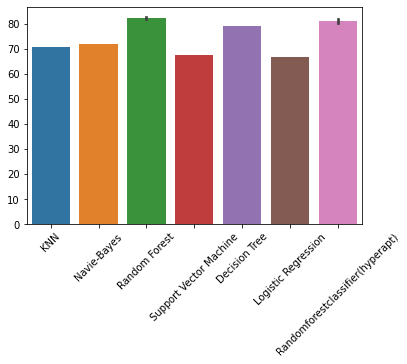

In [129]:
sns.barplot(x=algorithms,y=score)
plt.xticks(rotation=45)

Its clearly shows Randomforestclassifier(Hyperapt) is the best model to fit its gives 82% of accuracy for the prediction.

In [131]:
#print the true and predicted values
dictionary = {'Actual values': y_test, 'Predicted values': prediction}
pd.DataFrame.from_dict(dictionary)

,Actual values,Predicted values
0,0,0
1,0,0
2,1,1
3,1,1
4,1,1
...,...,...
270,0,0
271,1,0
272,0,0
273,0,0


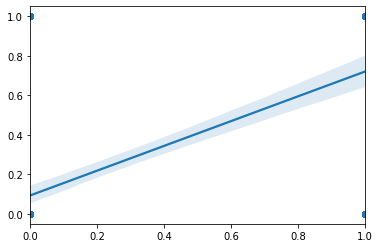

In [132]:
sns.regplot(y_test,prediction)

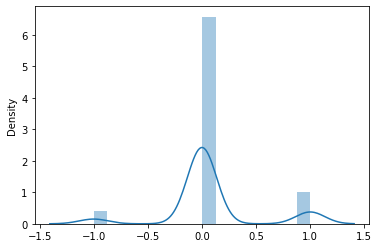

In [134]:
sns.distplot(y_test-prediction)                                                                                

In [133]:
#dump in pickllbe
import pickle 

file=open('Liver_disease_patient_predicton_model.pkl','wb')

pickle.dump(rf_random,file)